# 분류 평가 지표

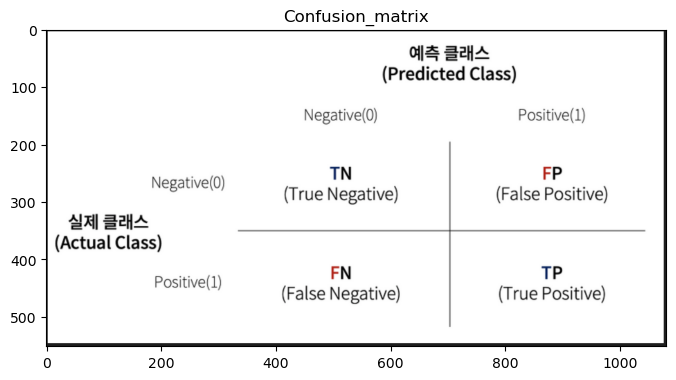

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
image = Image.open("오차행렬.png")
path1 = '오차행렬.png'
image_pil1 = Image.open(path1)
image1 = np.array(image_pil1)
plt.figure(figsize=(8,8))
plt.title('Confusion_matrix')
plt.imshow(image1)
plt.show()

|평가지표|내용|수식|
|:------|:------|:------:|
|정확도(Accuracy)|얼마나 잘 맞췄는지에 대한 지표| $$ (TN+TP)\over(TN+FP+FN+TP) $$ |
|정밀도(Precision)|예측을 T라고 했을때, 실제 T인 비율  (실제 음성인 데이터 예측을 양성으로 잘못 판단하게 되면 업무상 불편함이 발생할때 중요한 지표 ex: 주가가 오르지 않는데 주가가 오를거라고 예측하는 경우 위험)| $$ TP \over (FP + TP) $$ |
|재현율(Recall)|실제 T일때, 예측을 T라고 한 비율  (실제 양성인 데이터 예측을 음성으로 잘못 판단하게 되면 업무상 불편함이 발생하때 중요한 지표 ex: 암인데 암이 아니라고 예측하는 경우 위험|$$ TP \over (FN + TP) $$|
|F1 Score|데이터 불균형이 심할때 사용하는 지표| $$ 2 * {(precision * recall) \over (precision+recall)} $$ |

|ROC-AUC|내용|수식|
|:------|:------|:------:|
|ROC-AUC|예측 확률의 변화를 기반으로 한 수치이며, X축은 FPR, Y축은 TPR을 씀  |  변동 값 (예측 확률 값) 이기때문에 FPR, TPR에 영향을 받음|
|TNR|실제 F일때 예측을 F라고 한 비율 |$$TNR = {TP \over (FP + TP)}$$|
|FPR|실제 F일때 예측을 T라고 예측한 비율|$$ FPR = {FP \over (FP + TN)} = 1 - TNR $$|
|TPR|실제 T일때 예측을 T라고 한 비율|$$TPR = {TP \over (FN + TP)} = Recall $$ |



### predict와 predict_proba를 했을때의 roc_auc 값은 다름.
### Let's imagine you have only one example, it should be classified as False.
### If your classifier yields the probability of 0.7, the ROC-AUC value is 1.0-0.7=0.3.
### If you used predict, the prediction will be True = 1.0, so the ROC-AUC will be 1.0-1.0=0.0

In [2]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #roc_auc 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [5]:
# 예시 - 당뇨병 예측
data = pd.read_csv('당뇨병(3장).csv')

In [6]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=156, stratify=y)

## predict_proba로 AUC 값 구했을 경우

In [7]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC: 0.8083


## predict로 AUC 값 구했을 경우

In [8]:
get_clf_eval(y_test,pred,pred)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC: 0.7313


In [9]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--', label='Random')
    # FPR x축의 Scale을 0.1단위로 변경, X,Y 축 명 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1- Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

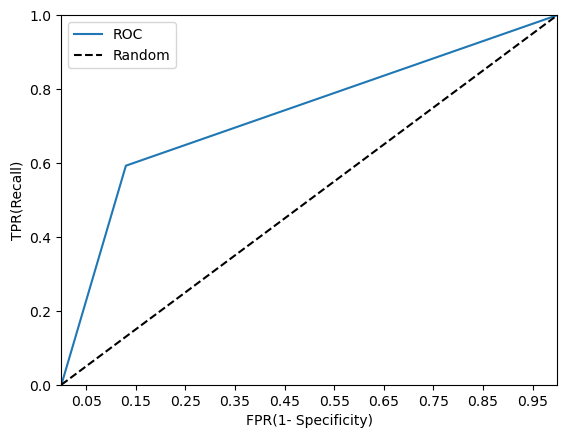

In [10]:
roc_curve_plot(y_test, pred)

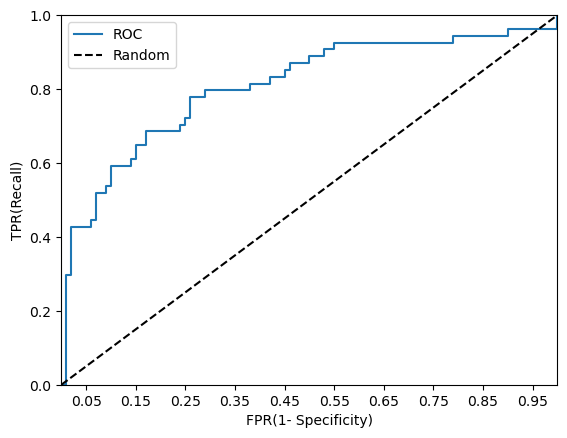

In [11]:
roc_curve_plot(y_test, pred_proba)

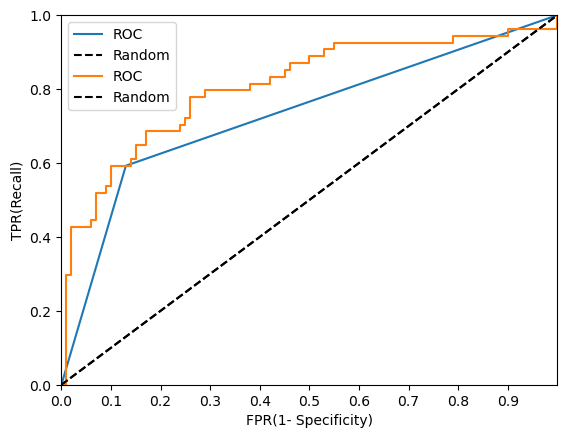

In [12]:
roc_curve_plot(y_test, pred)
roc_curve_plot(y_test, pred_proba)

In [13]:
precision_score(y_test, pred_proba)
# Classification metrics can't handle a mix of binary and continuous targets

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# 회귀 평가 지표

|평가 지표|내용|수식|
|:------|:------|:------:|
|MAE|실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것|$$MAE = {1\over n}\sum|Y_i-\hat{Y_i}|$$|
|MSE|실제 값과 예측값의 차이를 제곱해 평균한 것 | $$ MSE = {1\over n}\sum(Y_i-\hat{Y_i})^2 $$|
|RMSE|MSE는 실제 오류 평균보다 더 커지는 특성이 있어, 이 영향을 줄이는 수치로, MSE에 루트를 씌운 값|$$ RMSE = \sqrt{{1\over n}\sum(Y_i-\hat{Y_i})^2} $$|
|$$R^2$$|분산 기반 예측 성능 평가지표. 실제값 분산 대비 예측값 분산 비율|$$R^2 = {예측값 Variance \over 실제값 Variance} $$ |



In [14]:
# 예시 - 주택 가격 예측
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [15]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Price'] = boston.target

In [16]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
y_target = boston_df['Price']
X_data = boston_df.drop(['Price'], axis=1)

X_train, X_test, y_train ,y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=156)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = mean_squared_error(y_test, y_preds, squared=False)
r2 = r2_score(y_test, y_preds)

print('MAE:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}, R2:{3:.4f}'.format(mae,mse,rmse,r2))

MAE:3.2137, MSE:17.2969, RMSE:4.1590, R2:0.7572


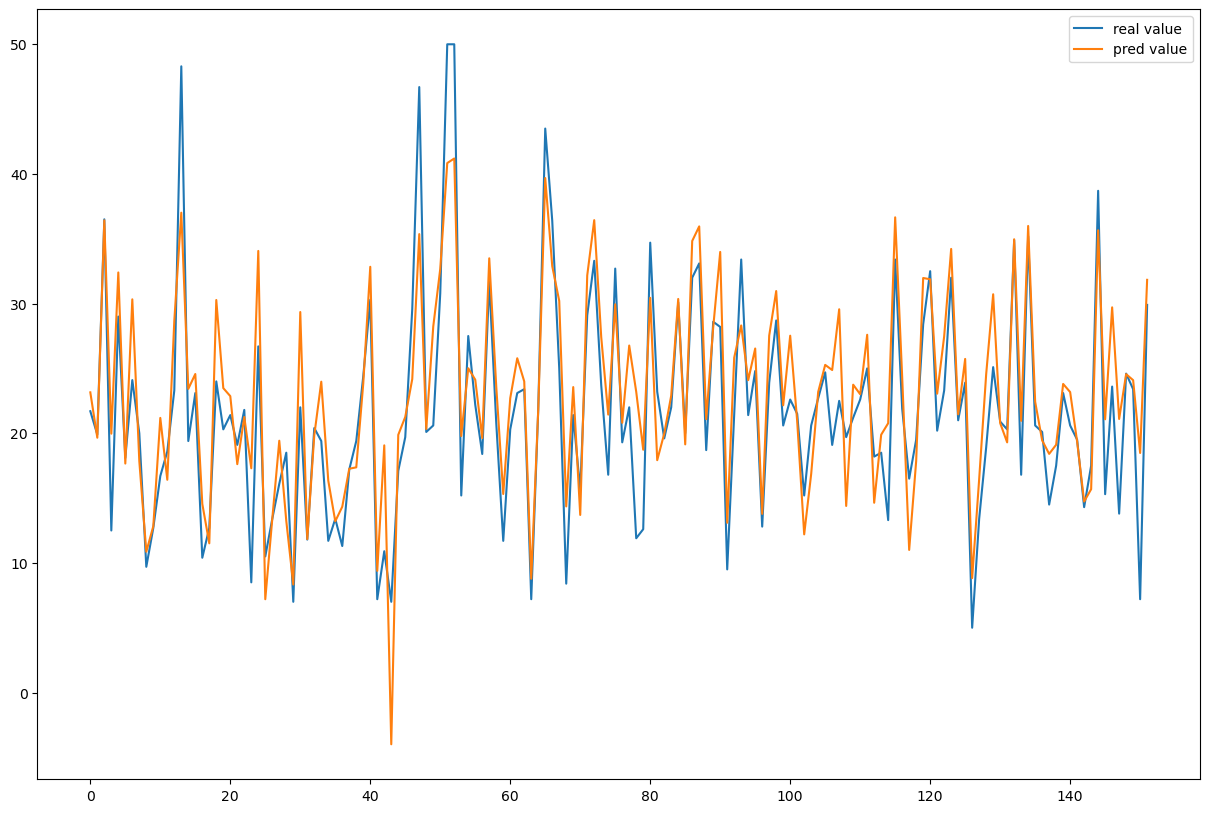

In [20]:
y_test_reset_index = y_test.reset_index(drop=True)
plt.figure(figsize = (15,10))
plt.plot(y_test_reset_index)
plt.plot(y_preds)
plt.legend(('real value','pred value'),fontsize=10)
plt.show()